# Linear Regression Unemployment Rate and Injuries

### Contents

#### 1. Importing libraries and data
#### 2. Data prep for regression analysis
#### 3. Regression analysis

### 1.0 Import Libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
# Define path
path = r'C:\Users\Owner\Documents\Career Foundry\Gun Violence'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', '02 02 Prepared Data', 'gun_violence_final.csv'))

### 2.0 Data Prep for Regression

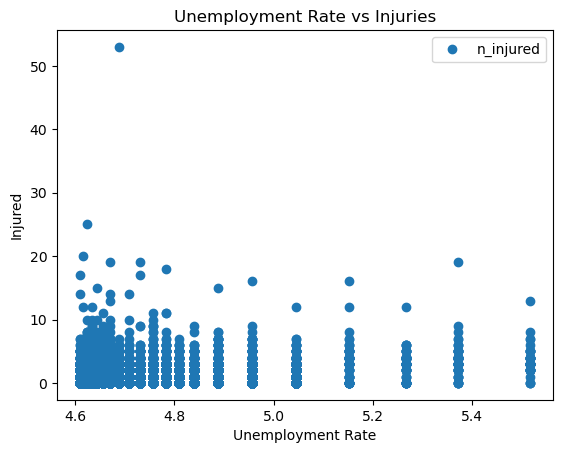

In [5]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'unemployment_rate', y='n_injured',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Unemployment Rate vs Injuries')  
plt.xlabel('Unemployment Rate')  
plt.ylabel('Injured')  
plt.show()

In [6]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['unemployment_rate'].values.reshape(-1,1)
y = df['n_injured'].values.reshape(-1,1)

In [7]:
X

array([[5.51689666],
       [5.51689666],
       [5.51689666],
       ...,
       [4.609289  ],
       [4.609289  ],
       [4.609289  ]])

In [8]:
y

array([[4],
       [3],
       [3],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [9]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 3.0 Regression Analysis

#### 3.1 Fill Data set

In [10]:
# Create a regression object.
regression = LinearRegression()

In [11]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

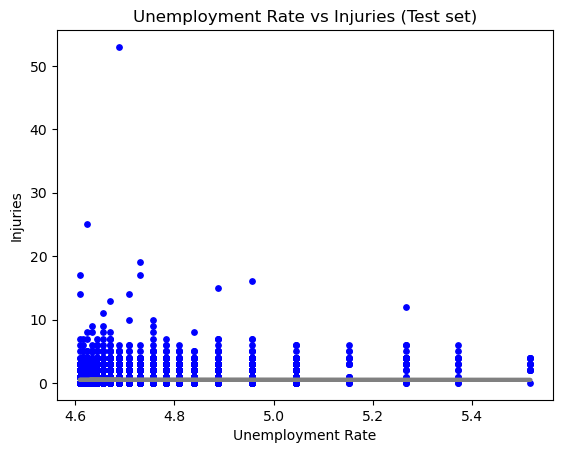

In [13]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='grey', linewidth =3)
plot_test.title('Unemployment Rate vs Injuries (Test set)')
plot_test.xlabel('Unemployment Rate')
plot_test.ylabel('Injuries')
plot_test.show()

In [14]:
# Create objects that contain the model summary statistics.
rmse_test = mean_squared_error(y_test, y_predicted)
r2_test = r2_score(y_test, y_predicted) 

In [15]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_test)
print('R2 score: ', r2_test)

Slope: [[-0.0263433]]
Mean squared error:  0.5709957574224621
R2 score:  2.8137503426450827e-05


In [16]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,0.495896
1,1,0.496352
2,1,0.493419
3,1,0.495368
4,0,0.497345
5,0,0.497584
6,1,0.496352
7,0,0.496352
8,0,0.492689
9,1,0.491938


In [17]:
y_predicted_train = regression.predict(X_train)

In [18]:
#Accuracy of trained model
rmse_train = mean_squared_error(y_train, y_predicted_train)
r2_train = r2_score(y_train, y_predicted_train)

In [19]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_train)
print('R2 score: ', r2_train)

Slope: [[-0.0263433]]
Mean squared error:  0.5164519907132207
R2 score:  1.956586506091096e-05


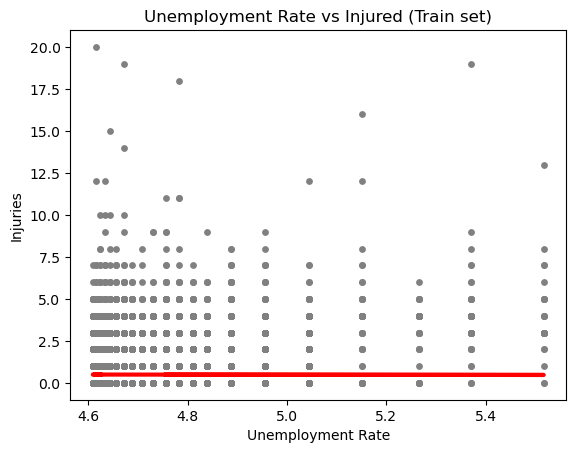

In [21]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='grey', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Unemployment Rate vs Injured (Train set)')
plot_test.xlabel('Unemployment Rate')
plot_test.ylabel('Injuries')
plot_test.show()